In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
%matplotlib inline
from nltk.corpus import stopwords
import openpyxl

In [40]:
df = pd.read_csv("./data/Tweets.csv")

In [41]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [42]:
df['tweet_count']=[0 for i in range(0,len(df))]

In [43]:
tweets = df['text']
emotion = df['airline_sentiment']
counts = df['tweet_count']
tweets = tweets[df['airline_sentiment_confidence']==1]
emotion = emotion[df['airline_sentiment_confidence']==1]
tweets.shape

(10445,)

negative    7382
neutral     1548
positive    1515
Name: airline_sentiment, dtype: int64

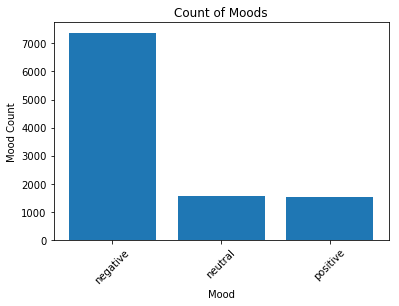

In [52]:
Index = [1,2,3]
mood_count = emotion.value_counts()
plt.bar(Index,mood_count)
plt.xticks(Index,['negative','neutral','positive'],rotation=45)
plt.ylabel('Mood Count')
plt.xlabel('Mood')
plt.title('Count of Moods')
mood_count

In [45]:
df['tweet_count']=[0 for i in range(0,len(df))]
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone', 'tweet_count'],
      dtype='object')

In [46]:
def mota_clean():
    import re
    from nltk.stem.snowball import SnowballStemmer, PorterStemmer
    p_tweets = []
    stemmer = SnowballStemmer('english')
    i=1
    for tweet in tweets:
        letters_only = re.sub("[^a-zA-Z]", " ",tweet) 
        words = letters_only.lower().split()
        stops = set(stopwords.words("english"))                  
        meaningful_words = [stemmer.stem(w) for w in words if not w in stops]
        #meaningful_words = [stemmer.stem(w) for w in words]
        p_tweets.append(" ".join(meaningful_words[1:]))
    return p_tweets

In [47]:
p_tweets = mota_clean()

In [14]:
import nltk
import re
from nltk.stem.snowball import SnowballStemmer, PorterStemmer
stemmer = PorterStemmer()
def clean_two (tweet):            #  WE USE ONLY THIS CLEANING FUNCTION
    tweet=removeNonAscii(tweet)
    tweet=remove(tweet,'@');
    tweet=remove(tweet,'#')       ###makes little difference
    linked=re.sub(r"http\S+", "", tweet)    
    splitted=nltk.word_tokenize(linked)                
    stems=[stemmer.stem(word) for word in splitted]
    stripped=strip(stems)
    result=" ".join(stripped)
    return result

def removeNonAscii(s): 
    return "".join(i for i in s if ord(i)<128)

def remove(text,symbol):
    filter(lambda x:x[0]!='#', text.split())
    s=" ".join(filter(lambda x:x[0]!=symbol, text.split()))
    return s

def strip (text):
    punctuation = list(string.punctuation)
    stop = stopwords.words('english') + punctuation + ['rt', 'via']
    terms_stop = [term for term in text if term not in stop]
    return terms_stop

In [15]:
p_tweets=[]
for tweet in tweets:
    p_tweets.append(clean_two(tweet))

In [16]:
p_tweets

['said',
 "'s realli aggress blast obnoxi `` entertain '' guest face amp littl recours",
 "'s realli big bad thing",
 "serious would pay 30 flight seat n't thi play 's realli onli bad thing fli VA",
 "wa amaz arriv hour earli 're good",
 'I lt 3 pretti graphic much better minim iconographi D',
 "thi great deal alreadi think 2nd trip amp I n't even gone 1st trip yet p",
 'thank',
 "So excit first cross countri flight lax mco I 've heard noth great thing virgin america",
 "I flew nyc sfo last week could n't fulli sit seat due two larg gentleman either side help",
 'I fli',
 'know would amazingli awesom bos-fll pleas I want fli onli',
 'I love thi graphic',
 'I love hipster innov feel good brand',
 'make bo gt la non stop perman anytim soon',
 'guy mess seating.. I reserv seat friend guy gave seat away ... I want free internet',
 "statu match program I appli 's three week call email respons",
 "happen 2 ur vegan food option At least say ur site know I wo n't abl 2 eat anyth next 6 hr",
 "

In [70]:
len(length)

NameError: name 'length' is not defined

In [71]:
len(emotion[emotion=="negative"])

7382

In [72]:
len(emotion[emotion=="positive"])

1515

In [73]:
len(emotion[emotion=="neutral"])

1548

In [74]:
len(emotion[emotion=="negative"])+len(emotion[emotion=="positive"])+len(emotion[emotion=="neutral"])

10445

In [75]:
counts

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
14610    0
14611    0
14612    0
14613    0
14614    0
14615    0
14616    0
14617    0
14618    0
14619    0
14620    0
14621    0
14622    0
14623    0
14624    0
14625    0
14626    0
14627    0
14628    0
14629    0
14630    0
14631    0
14632    0
14633    0
14634    0
14635    0
14636    0
14637    0
14638    0
14639    0
Name: tweet_count, Length: 14640, dtype: int64

In [76]:
len(le)

NameError: name 'le' is not defined

In [48]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
v = CountVectorizer(analyzer = 'word',ngram_range=(1,1))
x_train_v = v.fit_transform(p_tweets)

In [55]:
zz = pd.DataFrame(x_train_v.A, columns=v.get_feature_names())
zz[]

317

In [38]:
pd.DataFrame(x_train_v.A, columns=v.get_feature_names())['ywg'].sum()

2

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import recall_score, f1_score
from sklearn.cross_validation import cross_val_score,cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn import tree
lr = LogisticRegression(C=0.000000001,solver='liblinear')
nb = MultinomialNB(fit_prior=False, alpha=0.3)
svc = SVC(kernel = 'linear', max_iter = 1000)
knn = KNeighborsClassifier(n_neighbors=5)
dt = tree.DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=10)
clfs=[lr,nb,knn,dt,rf,svc]
names= ["Logistic Regression","Naive Bayes","Nearest Neighbours","Decision Tree","Random Forest","SVM"]
i=0
for clf in clfs:
    pred = cross_val_predict(clf,x_train_v,list(emotion),cv=10)
    print("THe report for "+str(names[i]))
    print(classification_report(list(emotion),pred))
    print("The accuracy for "+names[i]+" is :"+str(accuracy_score(list(emotion),pred)))
    i+=1


THe report for Logistic Regression
             precision    recall  f1-score   support

   negative       0.71      1.00      0.83      7382
    neutral       0.00      0.00      0.00      1548
   positive       0.00      0.00      0.00      1515

avg / total       0.50      0.71      0.59     10445

The accuracy for Logistic Regression is :0.706749640977
THe report for Naive Bayes
             precision    recall  f1-score   support

   negative       0.92      0.85      0.88      7382
    neutral       0.56      0.59      0.58      1548
   positive       0.65      0.83      0.72      1515

avg / total       0.82      0.81      0.82     10445

The accuracy for Naive Bayes is :0.811010052657


C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


THe report for Nearest Neighbours
             precision    recall  f1-score   support

   negative       0.85      0.67      0.75      7382
    neutral       0.26      0.54      0.35      1548
   positive       0.66      0.61      0.64      1515

avg / total       0.73      0.64      0.67     10445

The accuracy for Nearest Neighbours is :0.638966012446
THe report for Decision Tree
             precision    recall  f1-score   support

   negative       0.85      0.86      0.86      7382
    neutral       0.46      0.47      0.46      1548
   positive       0.68      0.64      0.66      1515

avg / total       0.77      0.77      0.77     10445

The accuracy for Decision Tree is :0.770033508856
THe report for Random Forest
             precision    recall  f1-score   support

   negative       0.84      0.93      0.89      7382
    neutral       0.59      0.40      0.48      1548
   positive       0.79      0.64      0.71      1515

avg / total       0.80      0.81      0.80     10445


C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:220: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:220: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:220: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:220: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sk

THe report for SVM
             precision    recall  f1-score   support

   negative       0.90      0.87      0.88      7382
    neutral       0.51      0.60      0.55      1548
   positive       0.78      0.76      0.77      1515

avg / total       0.82      0.81      0.82     10445

The accuracy for SVM is :0.811871708952


In [ ]:
f1_score(pred,y_test,average="micro")

In [ ]:
pred.shape

In [ ]:
nb = MultinomialNB(fit_prior=False, alpha=0.3)
pred = cross_val_predict(nb,v.fit_transform(p_tweets).toarray(),list(emotion),cv=10)
print(classification_report(list(emotion),pred))
print("The accuracy score is "+str(accuracy_score(pred, list(emotion))))

In [ ]:
print(classification_report(list(emotion),pred))

In [52]:
from sklearn.metrics import f1_score
fscores = []
accscores =[]
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    pred = cross_val_predict(knn,v.fit_transform(p_tweets),list(emotion),cv=10)
    print("THe report for "+str(i)+"NN")
    fscores.append(f1_score(list(emotion),pred, average = 'micro'))
    accscores.append(accuracy_score(list(emotion),pred))
    print(classification_report(list(emotion),pred))
    print("THe report for "+str(i)+"NN : "+str(accuracy_score(list(emotion),pred)))

THe report for 1NN
             precision    recall  f1-score   support

   negative       0.88      0.56      0.68      7382
    neutral       0.24      0.48      0.32      1548
   positive       0.41      0.70      0.52      1515

avg / total       0.72      0.57      0.61     10445

THe report for 1NN : 0.568693154619
THe report for 2NN
             precision    recall  f1-score   support

   negative       0.83      0.73      0.78      7382
    neutral       0.27      0.46      0.34      1548
   positive       0.66      0.55      0.60      1515

avg / total       0.72      0.67      0.69     10445

THe report for 2NN : 0.665198659646
THe report for 3NN
             precision    recall  f1-score   support

   negative       0.83      0.68      0.75      7382
    neutral       0.25      0.43      0.31      1548
   positive       0.57      0.65      0.61      1515

avg / total       0.71      0.64      0.66     10445

THe report for 3NN : 0.637434179033
THe report for 4NN
            

In [56]:
pd.Series(fscores).mean()

0.6394255624700813

In [108]:
from sklearn.ensemble import VotingClassifier
estimators = [('lr',lr),('svc',svc)]
vc = VotingClassifier(estimators,voting='soft')
pred = cross_val_predict(vc,x_train_v,list(emotion),cv=10,method='predict_proba')
print(classification_report(list(emotion),pred))
print("The accuracy score is "+str(accuracy_score(pred, list(emotion))))

TypeError: cross_val_predict() got an unexpected keyword argument 'method'